#### Similarity check for duplicates identification
Here the approaches for similarity checks are explained:  https://spotintelligence.com/2022/12/19/text-similarity-python/. I first did the similarity analysis in R, but had much longer computation times. I also compared the perfomance (i.e which articles detected as duplicates) and it turned out to be identical. 



In [ ]:
#import pandas as pd
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import PorterStemmer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import cosine_similarity

#coal_data_filtered = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation_Filtered.csv')

## Function to preprocess text
#def preprocess_text(text):
#    # Convert text to lowercase
#    text = text.lower()
#    # Tokenize text
#    tokens = word_tokenize(text)
#    # Remove stopwords
#    tokens = [word for word in tokens if word not in stopwords.words('english')]
#    # Perform stemming
#    stemmer = PorterStemmer()
#    stemmed_tokens = [stemmer.stem(word) for word in tokens]
#    # Combine tokens back into a single string
#    processed_text = ' '.join(stemmed_tokens)
#    return processed_text

## Select a subset of data
#subset_data = coal_data_filtered.iloc[:1000]

## Preprocess the article text
#subset_data['Article_Text_processed'] = subset_data['Article_Text'].apply(preprocess_text)

## Initialize an empty dataframe to store results
#result_df = pd.DataFrame(columns=['article_id_1', 'article_id_2', 'similarity'])

## Convert the texts into TF-IDF vectors
#vectorizer = TfidfVectorizer()
#vectors = vectorizer.fit_transform(subset_data['Article_Text_processed'])

## Calculate the cosine similarity between the vectors
#similarity_matrix = cosine_similarity(vectors)

## Loop through the similarity matrix to find similar articles
#for i in range(len(similarity_matrix)):
#    for j in range(i+1, len(similarity_matrix[i])):
#        similarity = similarity_matrix[i][j]
#        if similarity >= 0.80:
#            result_df = result_df.append({'article_id_1': i,
#                                          'article_id_2': j,
#                                          'similarity': similarity}, ignore_index=True)

## View the dataframe of pairs of similar articles
#print(result_df)



In [ ]:
#import pandas as pd
#import string
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import PorterStemmer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import cosine_similarity

## Load the data
#coal_data_filtered = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation_Filtered.csv')

## Function to preprocess text - For less complexity and faster computation 
#def preprocess_text(text):
#    # Convert text to lowercase
#    text = text.lower()
#    
#    # Remove punctuation
#    text = text.translate(str.maketrans('', '', string.punctuation))
#    
#    # Tokenize the text
#    tokens = word_tokenize(text)
#    
#    # Remove stopwords
#    stop_words = set(stopwords.words('english'))
#    tokens = [word for word in tokens if word not in stop_words]
#    
#    # Perform stemming
#    ps = PorterStemmer()
#    tokens = [ps.stem(word) for word in tokens]
#    
#    # Join tokens back into a string
#    text = ' '.join(tokens)
#    
#    return text

## Select a subset of data
#subset_data = coal_data_filtered.iloc[:50]

## Preprocess the article text
#coal_data_filtered['Article_Text_processed'] = coal_data_filtered['Article_Text'].apply(preprocess_text)

## Initialize an empty DataFrame to store results
#result_df = pd.DataFrame(columns=['article_id_1', 'article_id_2', 'similarity'])

## Loop through each pair of articles and calculate similarity
#for i in range(len(coal_data_filtered)):
#    text1 = coal_data_filtered['Article_Text_processed'][i]
#    for j in range(i+1, len(coal_data_filtered)):
#        text2 = coal_data_filtered['Article_Text_processed'][j]
#        
#        # Convert the texts into TF-IDF vectors
#        vectorizer = TfidfVectorizer()
#        vectors = vectorizer.fit_transform([text1, text2])
#
#        # Calculate the cosine similarity between the vectors
#        similarity = cosine_similarity(vectors)[0, 1]
#        
#        # Append the result to the DataFrame
#        if similarity >= 0.80:
#            result_df = result_df.append({'article_id_1': i, 'article_id_2': j, 'similarity': similarity}, ignore_index=True)
#
#print(result_df)


In [ ]:
# Filling NAs in the dataframe with an empty string
#coal_data_filtered['Article_Text'] = coal_data_filtered['Article_Text'].fillna('')


# Function to calculate similarities and include similarity scores
#def calculate_similarities(coal_data_filtered, threshold=0.80):
#    # Vectorizing the text data
#    vectorizer = TfidfVectorizer()
#    tfidf_matrix = vectorizer.fit_transform(coal_data_filtered['Article_Text'])
#    # Calculating Cosine Similarity
#    cos_sim = cosine_similarity(tfidf_matrix)
#    
#    # Identifying articles with similarity above the threshold
#    # and including similarity scores
#    duplicates = []
#    for i in range(cos_sim.shape[0]):
#        for j in range(i + 1, cos_sim.shape[1]):
#            if cos_sim[i, j] > threshold:
#                Article_Text_1 = coal_data_filtered.loc[coal_data_filtered.index[i], 'Article_Text']
#                Article_Text_2 = coal_data_filtered.loc[coal_data_filtered.index[j], 'Article_Text']
#                duplicates.append((coal_data_filtered.index[i], coal_data_filtered.index[j], cos_sim[i, j], Article_Text_1, Article_Text_2))
#    
#    return duplicates

## Applying the function to the entire DataFrame
#duplicate_articles = calculate_similarities(coal_data_filtered)

## Converting to DataFrame
#duplicates_df = pd.DataFrame(duplicate_articles, columns=['Article_Index_1', 'Article_Index_2', 'Similarity_Score', 'Article_Text_1', 'Article_Text_2'])

## Inspecting the duplicates with scores
#print(duplicates_df)

## Printing the pairs in the console for inspection
#for index, row in duplicates_df.iterrows():
#    print("Duplicate Pair:")
#    print("Article 1:\n", coal_data_filtered.loc[row['Article_Index_1'], 'Article_Text'])
#    print("Article 2:\n", coal_data_filtered.loc[row['Article_Index_2'], 'Article_Text'])
#    print("\n")


In [23]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

coal_data_filtered = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation_Filtered.csv')


# Filling NAs in the dataframe with an empty string
coal_data_filtered['Article_Text'] = coal_data_filtered['Article_Text'].fillna('')
#coal_data_filtered = coal_data_filtered.iloc[:100]

#stop_words = set(stopwords.words('english'))
#stemmer = PorterStemmer()

#def preprocess_text(text):
    # Tokenize
#    tokens = word_tokenize(text.lower())
#    # Remove punctuation and stop words, and stem
#    processed_tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
#    return ' '.join(processed_tokens)

# Apply preprocessing to 'Article_Text' column
#coal_data_filtered['Article_Text'] = coal_data_filtered['Article_Text'].apply(preprocess_text)



# Function to calculate similarities and include similarity scores
def calculate_similarities(coal_data_filtered, threshold=0.80):
    # Vectorizing the text data
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(coal_data_filtered['Article_Text'])
    # Calculating Cosine Similarity
    cos_sim = cosine_similarity(tfidf_matrix)
    
    # Identifying articles with similarity above the threshold
    # and including similarity scores
    duplicates = []
    for i in range(cos_sim.shape[0]):
        for j in range(i + 1, cos_sim.shape[1]):
            if cos_sim[i, j] > threshold:
                Article_Text_1 = coal_data_filtered.loc[coal_data_filtered.index[i], 'Article_Text']
                Article_Text_2 = coal_data_filtered.loc[coal_data_filtered.index[j], 'Article_Text']
                duplicates.append((coal_data_filtered.index[i], coal_data_filtered.index[j], cos_sim[i, j], Article_Text_1, Article_Text_2))
    
    return duplicates

# Applying the function to the entire DataFrame
duplicate_articles = calculate_similarities(coal_data_filtered)

# Converting to DataFrame
duplicates_df = pd.DataFrame(duplicate_articles, columns=['Article_Index_1', 'Article_Index_2', 'Similarity_Score', 'Article_Text_1', 'Article_Text_2'])


# Writing the duplicates to a CSV file
duplicates_df.to_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/duplicate_articles.csv', index=False)

print("Duplicates saved to duplicate_articles.csv")




Duplicates saved to duplicate_articles.csv


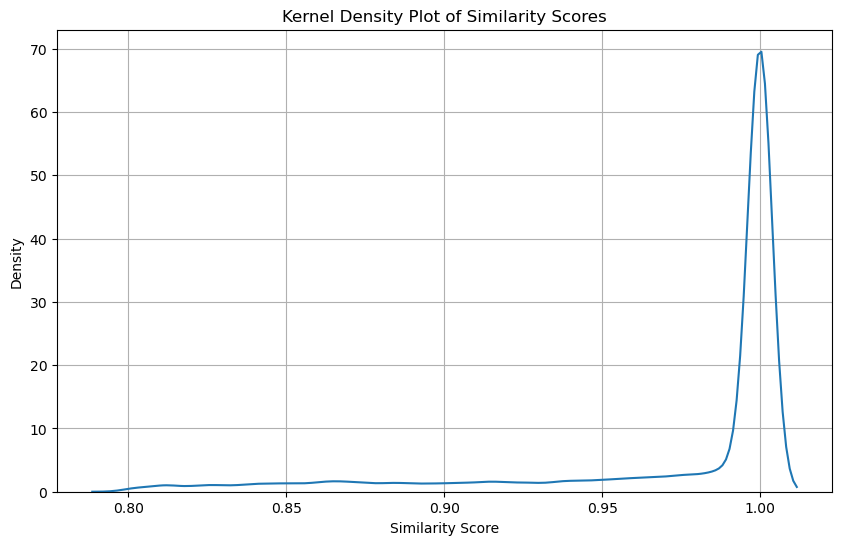

   Unnamed: 0.1  Unnamed: 0  \
2             2         168   
3             3         261   
4             4         263   
5             5         360   
6             6         361   

                                        Jurisdiction  Location ContentType  \
2                                      International       NaN        News   
3                                      International       NaN        News   
4  U.S. Federal; International; Massachusetts; Wa...       NaN        News   
5                                      International       NaN        News   
6                                      International       NaN        News   

            Byline  WordLength  WebNewsUrl  Geography  NegativeNews  ...  \
2              NaN        1860         NaN        NaN           NaN  ...   
3     Ingi Salgado         700         NaN        NaN           NaN  ...   
4     Patrick Bond        1768         NaN        NaN           NaN  ...   
5  Eleanor Momberg         867         N

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

duplicates_df = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/duplicate_articles.csv')
coal_data_filtered = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation_Filtered.csv')

# Printing the pairs in the console for inspection
#for index, row in duplicates_df.iterrows():
#    print("Duplicate Pair:")
#    print("Article 1:\n", coal_data_filtered.loc[row['Article_Index_1'], 'Article_Text'])
#    print("Article 2:\n", coal_data_filtered.loc[row['Article_Index_2'], 'Article_Text'])
#    print("\n")

# Kernel density plot of similarity scores
plt.figure(figsize=(10, 6))
sns.kdeplot(duplicates_df['Similarity_Score'], bw_adjust=0.5)
plt.title('Kernel Density Plot of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# Filtering for similarity scores above 0.8 threshold (same as Arne), but almost all have either no similarity or similarity of 1 (see kernel density plot)
high_similarity = duplicates_df[duplicates_df['Similarity_Score'] > 0.8]

# Flattening the list of all article indices considered duplicates
duplicate_indices_flat = pd.concat([high_similarity['Article_Index_1'], high_similarity['Article_Index_2']]).unique()

# Marking the first occurrence of each article as not a duplicate
coal_data_filtered['is_duplicated'] = coal_data_filtered.index.isin(duplicate_indices_flat)
coal_data_filtered['duplicate_mark'] = coal_data_filtered.duplicated(subset=['Article_Text'], keep='first') | coal_data_filtered['is_duplicated']

# Removing marked duplicates
df_nodup = coal_data_filtered[~coal_data_filtered['duplicate_mark']]

# Dropping the helper columns
df_nodup = df_nodup.drop(columns=['is_duplicated', 'duplicate_mark'])

# Checking the result
print(df_nodup.head())

# Saving the filtered DataFrame
df_nodup.to_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/coal_data_filtered_nodup.csv', index=False)


### Some further cleaning of the dataset
##### Deleting empty and non-sensical variables from dataset. Renaming some variables and creating some new info

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import re


coal_data_filtered_nodup = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/coal_data_filtered_nodup.csv')


print(coal_data_filtered_nodup.head())




   Unnamed: 0.1  Unnamed: 0  \
0             2         168   
1             3         261   
2             4         263   
3             5         360   
4             6         361   

                                        Jurisdiction  Location ContentType  \
0                                      International       NaN        News   
1                                      International       NaN        News   
2  U.S. Federal; International; Massachusetts; Wa...       NaN        News   
3                                      International       NaN        News   
4                                      International       NaN        News   

            Byline  WordLength  WebNewsUrl  Geography  NegativeNews  ...  \
0              NaN        1860         NaN        NaN           NaN  ...   
1     Ingi Salgado         700         NaN        NaN           NaN  ...   
2     Patrick Bond        1768         NaN        NaN           NaN  ...   
3  Eleanor Momberg         867         N

In [2]:


# Empty Columns to be removed.. What about extracts? check again. 
columns_to_remove = [
   "Jurisdiction", "Location",
    "WebNewsUrl", "Geography",
    "NegativeNews", "SourcePath",
    "Industry", "People", "Subject",
    "Company", "PublicationType", 
    "Publisher", "Document", "GroupDuplicates",
    "InternationalLocation", "LEI", "CompanyName",
    "LNGI", "SearchWithinResults", "Exclusions",
    "ResultID", "SearchType", "Source","Topic",
    "PracticeArea", "Keyword", "AppliedPostFilter",
    "DocumentContent_odata_mediaContentType",
    "DocumentContent_odata_mediaReadLink","IsCitationMatch", 
    "SourcePath"
    
]

# Removing the specified columns, using 'errors='ignore'' to skip any columns that don't exist in the DataFrame
coal_data_filtered_nodup = coal_data_filtered_nodup.drop(columns=columns_to_remove, axis=1, errors='ignore')


# Renaming 'News.Outlet' column to 'Outlet'
#coal_data_filtered_nodup.rename(columns={'News Outlet': 'Outlet'}, inplace=True)

# Creating a new table with publication counts, average word counts, and median word counts
publication_stats = coal_data_filtered_nodup.groupby('News Outlet').agg(
    Article_Count=('News Outlet', 'size'),
    Average_Word_Count=('WordLength', 'mean'),
    Median_Word_Count=('WordLength', 'median')
).reset_index()

# Calculate total number of articles
total_articles = publication_stats['Article_Count'].sum()

# Add total articles to the DataFrame
publication_stats.loc[len(publication_stats)] = ['Total', total_articles, None, None]



# Displaying the new table
print(publication_stats)

                                          News Outlet  Article_Count  \
0                                         Africa News           1565   
1                                Africanews (English)             38   
2                         Business Day (South Africa)           1185   
3                           Cape Argus (South Africa)            480   
4   Cape Argus (South Africa)/Argus Weekend (South...            228   
5                                  Cape Business News             35   
6                           Cape Times (South Africa)            947   
7                       Daily Dispatch (South Africa)            562   
8                                      Daily Maverick              2   
9                           Daily News (South Africa)            492   
10                                          Daily Sun             23   
11                      Financial Mail (South Africa)            786   
12                                    Mail & Guardian           

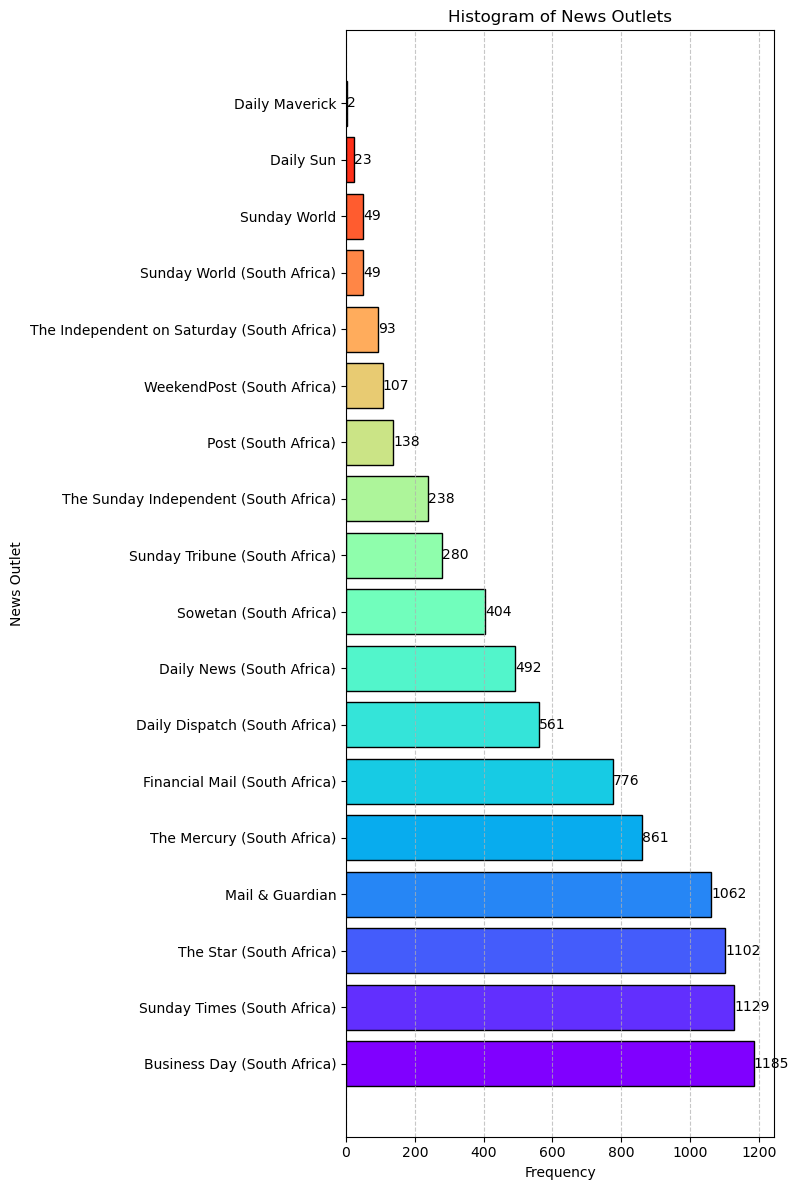

In [12]:
#import numpy as np

# Get the unique values of the 'News Outlet' column
#unique_outlets = coal_data_filtered_nodup['News Outlet'].unique()

# Count the frequency of each outlet
#outlet_counts = coal_data_filtered_nodup['News Outlet'].value_counts()

# Plot histogram with outlets on the y-axis
#plt.figure(figsize=(8, 12))  # Adjust figure size as needed

# Define colors using a colormap
#colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_outlets)))

# Plot horizontal bars with rainbow colors
#plt.barh(outlet_counts.index, outlet_counts.values, color=colors, edgecolor='black')
#plt.xlabel('Frequency')
#plt.ylabel('News Outlet')
#plt.title('Histogram of News Outlets')

# Annotate each bar with the number of articles
#for i, count in enumerate(outlet_counts.values):
#    plt.text(count, i, str(count), ha='left', va='center')
#
#plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
#plt.tight_layout()
#plt.show()

TO DO:
Africa News is not a pure SA outlet, but pan-african. What about Pretoria news, Cape Times and Cape Argus, Cape Business News, etc.? Take out, because these are regional outlets? Need to check again the newspapers

In [38]:
outlets_to_remove = ['Africa News', 'Africanews (English)', 'Pretoria News (South Africa)', 'Pretoria News Weekend (South Africa)', 
                    'Cape Business News', 'Cape Argus (South Africa)/Argus Weekend (South Africa)',
                     'Pretoria News (South Africa)/Pretoria News Weekend (South Africa)', 'Cape Argus (South Africa)', 'Cape Times (South Africa)','The Herald (South Africa)']
#Remove outlets
coal_data_filtered_nodup = coal_data_filtered_nodup[~coal_data_filtered_nodup['News Outlet'].isin(outlets_to_remove)]


In [20]:
#valid_outlets = coal_data_filtered_nodup[coal_data_filtered_nodup['News Outlet'] != 'missing']

In [ ]:
# Initialize a variable to store the sum of articles
#total_articles = 0

# Iterate through unique "News Outlet" values
#for outlet in valid_outlets['News Outlet'].unique():
#    # Calculate the number of articles for the current outlet
#    num_articles = len(valid_outlets[valid_outlets['News Outlet'] == outlet])
#    print(f"Number of articles for {outlet}: {num_articles}")
#    # Add the number of articles for the current outlet to the total sum
#    total_articles += num_articles
#
#print("Total number of articles:", total_articles)

#### Further Cleaning steps
Drop articles with less than 70 words as well as articles containing zero times the word "coal" (Check First). Additionaly
check on articles with high number of coal mentions and very long articles. And remove articles with zero occurences of "coal"

In [7]:
# Filter articles with text length less than 70 words
short_articles = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].str.split().apply(len) < 70]

# Print some short articles for checking on content of these articles
for i, article in short_articles.head(10).iterrows():
    print(f"Article {i + 1}:\n{article['Article_Text']}\n")


# Total number of articles with length < 70 words    
total_short_articles = len(short_articles)

print("Total number of articles with less than 70 words:", total_short_articles)


Article 1034:
Power ranges 4,000 Megawatts needed to be shed from the national grid 12 Eskom coal power stations, all located in Mpumalanga and Gauteng 70% Of their potential power Medupi and Kusile are supplying

Article 1153:
12 The number of coal-fired power stations in the Highveld Priority Area R300bn The cost of bringing the stations in line with minimum emisssions standards, according to Eskom

Article 1332:
50 MT+ The annual volume at the Richards Bay Coal Terminal compared with its 90MT capacity

Article 1772:
THE STRIKE by the National Union of Mineworkers (NUM) at Glencore\'s Koornfontein coal mine in Mpumalanga has cost production and it is fast approaching the two-month mark in duration.

Article 4882:
Deputy Minister of Public Enterprises, Bulelani Magwanishe, will on 14 July, launch an extra loop to increase the rail capacity for Transnet trains that operate between Lephalale and Richards Bay Coal Terminal. The completion of the loop is the first of five stage expansion 

In [35]:
# Filter articles with text length greater than or equal to 70 words -> removed 39 articles
coal_data_filtered_nodup = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].str.split().apply(len) >= 70]


To do: Eventually set higher limit 

In [6]:
# Filter articles with text length less than 70 words
super_long_articles = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].str.split().apply(len) > 2000]

for i, article in super_long_articles.head(5).iterrows():
    print(f"Article {i + 1}:\n{article['Article_Text']}\n")


# Total number of articles with length > 2000 words    
total_super_long_articles = len(super_long_articles)

print("Total number of articles with more than 2000 words:", total_super_long_articles)

Article 85:
ONE HOUR. As little as R50. A hi-tech copier that has watermarking capabilities. And a stamp. This is all that is needed to create a fraudulent document on the streets of Joburg. From a matric certificate to a sick note, a school promotional report or a transfer letter, you could buy anything from R50 to R1 500. While a transfer letter would cost R50, a school report is a mere R100, R150 gets you a sick note and R1 500 can buy you a matric certificate. And while the fraudsters do not advertise, they have a market and word of mouth is their marketing tool. The Sunday Independent tested how easy it is to obtain fraudulent documents. In one week we were able to secure a report, a transfer letter, a matric certificate and a sick note. But the documents failed an authenticity test - authorities rejected them. Our journey starts in Zola, Soweto. My role is that of a teenager\'s mother. The story is simple: my son has failed Grade 10 and I want him to be promoted to the next grade

Check super long articles more in detail. Also found false positive indicator "coal stove"

After the first runs of topic model, becomes obvious that there are a few more false positives
especially connected to cooking and sayings involving the word coal

In [47]:
coal_data_filtered_nodup = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/coal_data_filtered_nodup_cleaned.csv')

# Removing the false positives detected with first topic model results!
# Especially relate to cooking on coals, etc.: 
list_false_positives = ["over hot coals", "cooking on coals", "medium coals" "cooking on the coals",
                       "coal for cooking", "hot coals", "into the coals" "on the coals", "coal stove",
                       "cooked on coals", "coal-fired oven", "coal-roasted", "charcoal"]

# Filtering articles that contain the word 'coal'
#coal_data_filtered_nodup = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].str.contains('coal', case=False, na=False)]

# Function to check if any false positive phrases are in the text
def contains_false_positives(text):
    return any(phrase in text.lower() for phrase in list_false_positives)

# Counting the number of false positive articles
false_positives_count = coal_data_filtered_nodup['Article_Text'].apply(contains_false_positives).sum()

# Check the articles
false_positives = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].apply(contains_false_positives)]
for i, article in false_positives.head(2).iterrows():
    print(f"Article {i + 1}:\n{article['Article_Text']}\n")


# Further filter the DataFrame to exclude rows with false positive phrases
coal_data_filtered_nodup = coal_data_filtered_nodup[~coal_data_filtered_nodup['Article_Text'].apply(contains_false_positives)]

# Display the number of false positive articles
print(f"Number of false positive articles: {false_positives_count}")


print(coal_data_filtered_nodup)

# to count "coal"- occurences in each text
def count_coal_occurrences(text):
    return text.lower().count('coal')

# After inspection: coalface and over the coals were (rarely) mentioned in context of coal as energy source. To
# not loose relevant articles I only eliminate articles containing these words AND in which the word "coal" occurs
# less than 3 times. Manual inspection of results support that approach. 
articles_dropped = []

# Iterate through rows to identify articles to drop
for index, row in coal_data_filtered_nodup.iterrows():
    if any(term in row['Article_Text'].lower() for term in ["coal face", "coalface", "over the coals"]):
        coal_count = count_coal_occurrences(row['Article_Text'])
        if coal_count < 3:
            articles_dropped.append(row['Article_Text'])  # Store the dropped article
            coal_data_filtered_nodup = coal_data_filtered_nodup.drop(index)  # Drop the row from DataFrame

# Print the number of dropped articles
print(f"Number of dropped articles: {len(articles_dropped)}")

# Print overview of dropped articles
print("\nOverview of dropped articles:")
for i, article in enumerate(articles_dropped[:100]):  # Print the first two dropped articles
    print(f"Dropped Article {i + 1}:")
    print(article)
    print("\n")
    
print(coal_data_filtered_nodup)

Article 32:
"We don\'t care about Gucci and Prada. We just want delivery eKasi," says a Wesselton resident after four days of heated, violent protests in the township near Ermelo, Mpumalanga. It is Friday morning and he is one of scores of young, unemployed men walking the streets. The anger in his voice is palpable. He spits the words "Gucci" and "Prada" out, referring to the penchant for fine things ANC politicians have acquired in their years of power. The man, who identifies himself only as Nkosinathi, believes he will probably chastised and perhaps even killed for speaking out against the ruling party. This is Mpumalanga, after all. "I\'ve been receiving threats. People are telling me we are on a hit list because we are anti-revolutionary and anti-ANC. We are not anti-ANC. These are the very same issues that confront the communities of other areas. We want decent water, toilets and jobs. But (those other communities) are living in fear." Residents of Wesselton say they are no long

Number of false positive articles: 160
      Unnamed: 0.1  Unnamed: 0  \
0                2         168   
1                3         261   
2                4         263   
3                5         360   
4                6         361   
...            ...         ...   
8510         24465       82547   
8511         24466       82917   
8512         24467       84291   
8513         24468       84336   
8514         24470       85572   

                                           Jurisdiction  Location ContentType  \
0                                         International       NaN        News   
1                                         International       NaN        News   
2     U.S. Federal; International; Massachusetts; Wa...       NaN        News   
3                                         International       NaN        News   
4                                         International       NaN        News   
...                                                 ...       ... 

In [24]:
# Define the list of keywords
list_potential_fp = ["music", "jazz", "grill", "cooking", "cook", "football", "sport", "concert", "charcoal"]

# Create a boolean mask indicating whether each article contains any of the keywords
mask = coal_data_filtered_nodup['Article_Text'].str.contains('|'.join(list_potential_fp), case=False)

# Filter the DataFrame based on the mask
filtered_articles = coal_data_filtered_nodup[mask]

# Print the filtered articles
for i, article in filtered_articles.head(30).iterrows():
    print(f"Article {i + 1}:\n{article['Article_Text']}\n")


Article 6:
Eskom has moved to calm critics of its preferential pricing deals by confirming it is renegotiating long-term contracts with an aluminium producer and a mining house. The announcement this week that the electricity utility had two customers on special deals through which they paid less for energy than other industries and consumers, erupted in a row: Cosatu threatening to mobilise its members and the Cape Chamber of Commerce called for a full investigation into the so-called sweetheart deals. The deals were shrouded in secrecy and apparently not disclosed to the National Energy Regulator when Eskom applied for its three-year, 35 percent increase. Eskom officials had told Parliament that its key industrial customers paid lower rates for electricity through special agreements, but that details of these contracts were confidential. Andrew Etzinger, Eskom spokesman, told The Sunday Independent that contrary to recent speculation the utility did not have special contracts in plac

In [ ]:
# Removing articles with zero occurences of coal

In [36]:
coal_data_filtered_nodup = coal_data_filtered_nodup[coal_data_filtered_nodup['Article_Text'].str.contains('coal', case=False, na=False)]


In [48]:
# save cleaned datafrmae
coal_data_filtered_nodup.to_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/coal_data_filtered_nodup_cleaned2.csv', index=False)


In [3]:
#import pandas as pd
coal_data_filtered_nodup = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/coal_data_filtered_nodup_cleaned.csv')


In [3]:
# Creating a new table with publication counts, average word counts, and median word counts
publication_stats = coal_data_filtered_nodup.groupby('News Outlet').agg(
    Article_Count=('News Outlet', 'size'),
    Average_Word_Count=('WordLength', 'mean'),
    Median_Word_Count=('WordLength', 'median')
).reset_index()

# Calculate total number of articles
total_articles = publication_stats['Article_Count'].sum()

# Add total articles to the DataFrame
publication_stats.loc[len(publication_stats)] = ['Total', total_articles, None, None]



# Displaying the new table
print(publication_stats)

                                   News Outlet  Article_Count  \
0                  Business Day (South Africa)           1182   
1                Daily Dispatch (South Africa)            556   
2                               Daily Maverick              2   
3                    Daily News (South Africa)            486   
4                                    Daily Sun             23   
5                Financial Mail (South Africa)            776   
6                              Mail & Guardian           1061   
7                          Post (South Africa)            138   
8                       Sowetan (South Africa)            400   
9                  Sunday Times (South Africa)           1126   
10               Sunday Tribune (South Africa)            279   
11                                Sunday World             48   
12                 Sunday World (South Africa)             49   
13  The Independent on Saturday (South Africa)             93   
14                  The M

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_30373/4204878203.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('M')


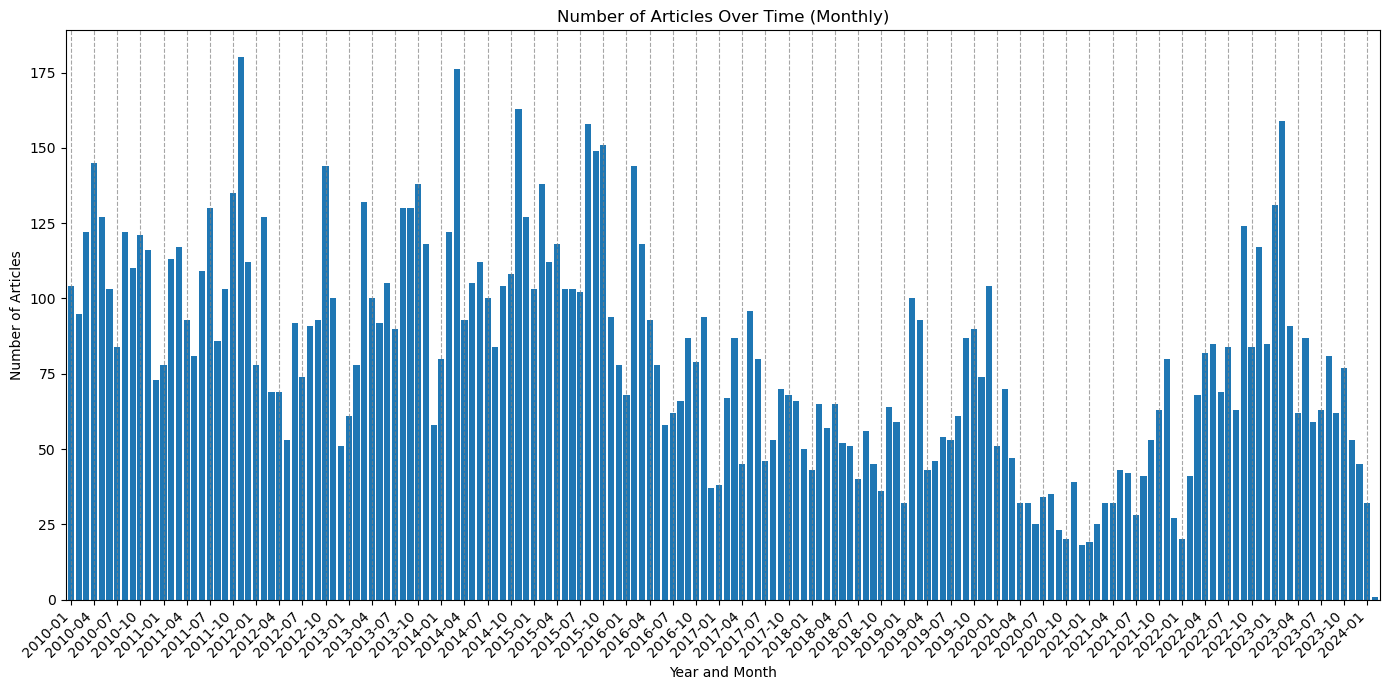

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_30373/4204878203.py:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')


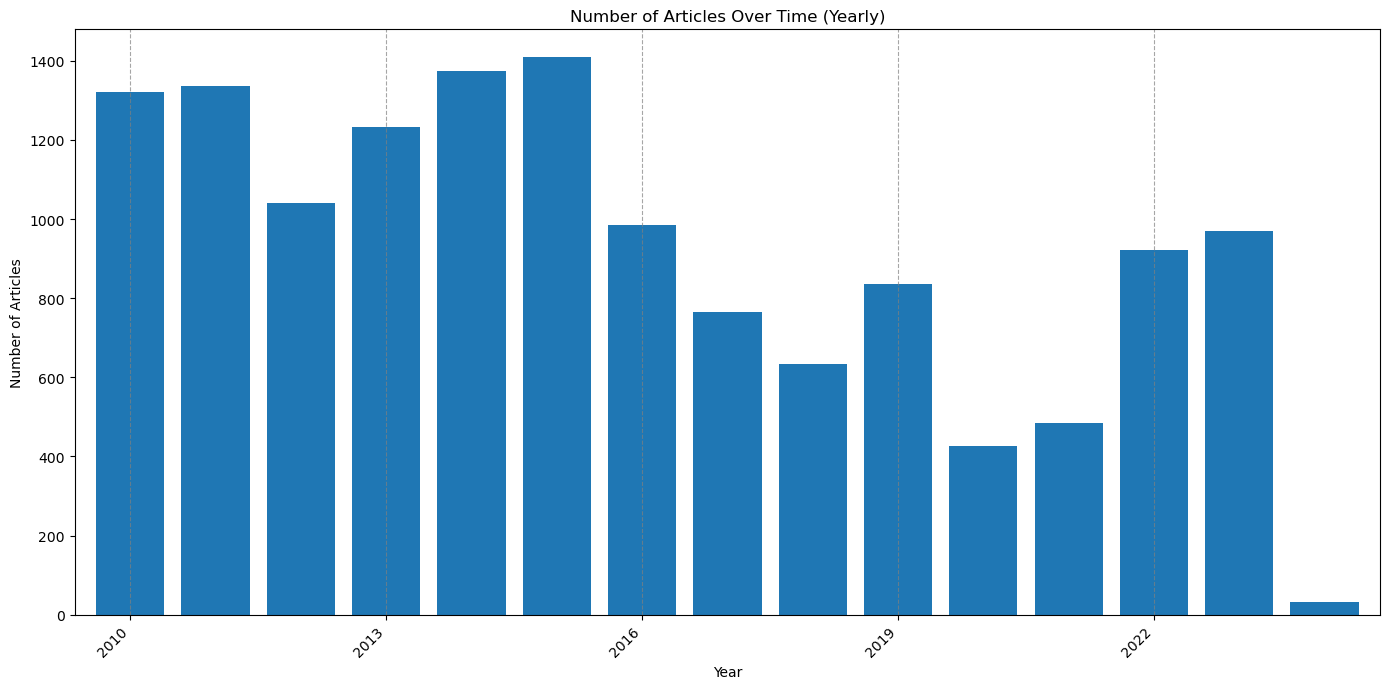

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import re

coal_data_filtered_nodup['Date'] = pd.to_datetime(coal_data_filtered_nodup['Date'])

# Generating a histogram of articles over time on a monthly basis
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('M')
plt.figure(figsize=(14, 7))  # Increased figure size
ax = coal_data_filtered_nodup.groupby('YearMonth').size().plot(kind='bar', width=0.8)
plt.title('Number of Articles Over Time (Monthly)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Articles')
# Setting a ticker to control the density of the x-axis labels
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()



# Generating a histogram of articles over time on a Yearly basis
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')
plt.figure(figsize=(14, 7))  # Increased figure size
ax = coal_data_filtered_nodup.groupby('YearMonth').size().plot(kind='bar', width=0.8)
plt.title('Number of Articles Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
# Setting a ticker to control the density of the x-axis labels
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

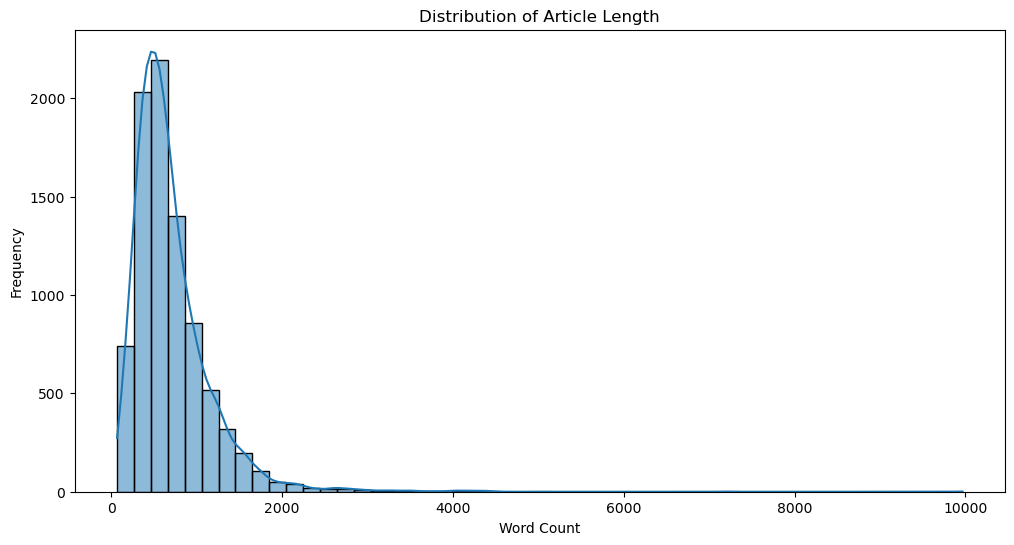

In [15]:
# Generating a histogram for the distribution of article length
plt.figure(figsize=(12, 6))
sns.histplot(coal_data_filtered_nodup['WordLength'], bins=50, kde=True)
plt.title('Distribution of Article Length')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

Occurrences	Number of Articles
---------------------------------
1		4501
2		1417
3		692
4		443
5		299
6		237
7		148
8		132
9		91
10		88
11		64
12		56
13		50
14		30
15		29
16		40
17		31
18		15
19		15
20		14
21		15
22		12
23		12
24		9
25		9
26		13
27		3
28		5
29		6
30		7
31		7
32		2
33		3
34		4
35		2
36		1
41		1
42		2
43		2
44		2
45		1
46		2
57		1
67		1
69		1


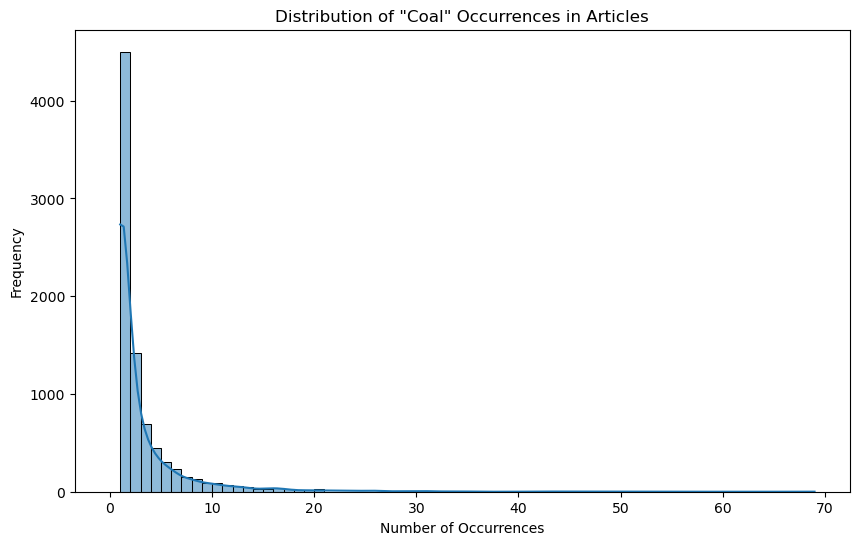

In [33]:
# Convert all articles to lowercase for case-insensitive search
coal_data_filtered_nodup['Article_Text'] = coal_data_filtered_nodup['Article_Text'].str.lower()

# Count occurrences of "coal" in articles
coal_occurrences_count = coal_data_filtered_nodup['Coal_Occurrences'].value_counts().sort_index()

# Display the distribution
print("Occurrences\tNumber of Articles")
print("---------------------------------")
for occurrences, count in coal_occurrences_count.items():
    print(f"{occurrences}\t\t{count}")


# Count occurrences of the word "coal"
coal_data_filtered_nodup['Coal_Occurrences'] = coal_data_filtered_nodup['Article_Text'].str.count('coal')
# Define bins for histogram
bins = list(range(21)) + [21]  # Individual bins for each count up to 20, and a single bin for everything above 20

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(coal_data_filtered_nodup['Coal_Occurrences'], bins=bins, kde=True)
plt.title('Distribution of "Coal" Occurrences in Articles')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.show()

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_19589/2388022404.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')


Total mentions of 'JETP': 61


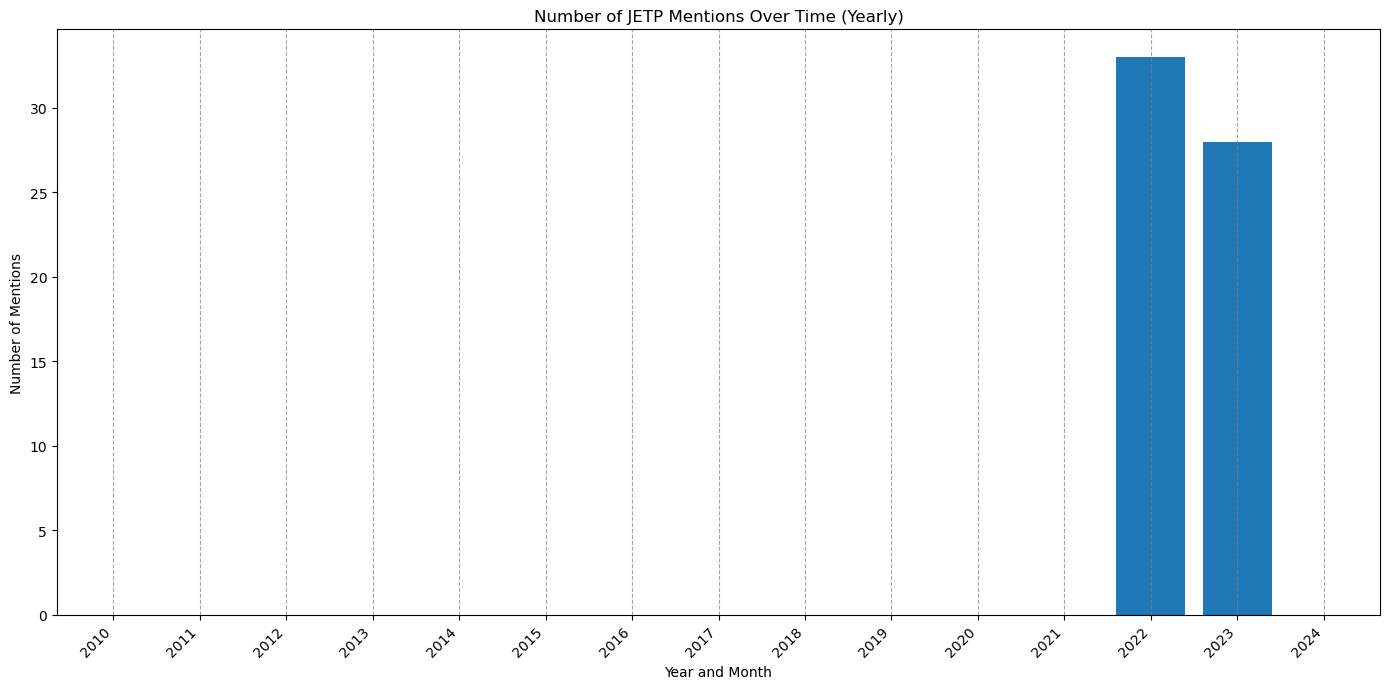

In [19]:
coal_data_filtered_nodup['Date'] = pd.to_datetime(coal_data_filtered_nodup['Date'])

# Extract year and month from the 'Date' column
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')

# Extract mentions of "JETP" from the 'Article_Text' column
coal_data_filtered_nodup['JETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)
total_jetp_mentions = coal_data_filtered_nodup['JETP_Mentions'].sum()
print("Total mentions of 'JETP':", total_jetp_mentions)

# Group by YearMonth and sum the mentions of "JETP" for each month
jetp_mentions_per_month = coal_data_filtered_nodup.groupby('YearMonth')['JETP_Mentions'].sum()

# Plot the histogram
plt.figure(figsize=(14, 7))  # Increased figure size
jetp_mentions_per_month.plot(kind='bar', width=0.8)
plt.title('Number of JETP Mentions Over Time (Yearly)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

There are about 60 (90 if include regional newspapers)  mentions of JETP in the articles (including articles with multiple mentions)

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_19589/2954267103.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')


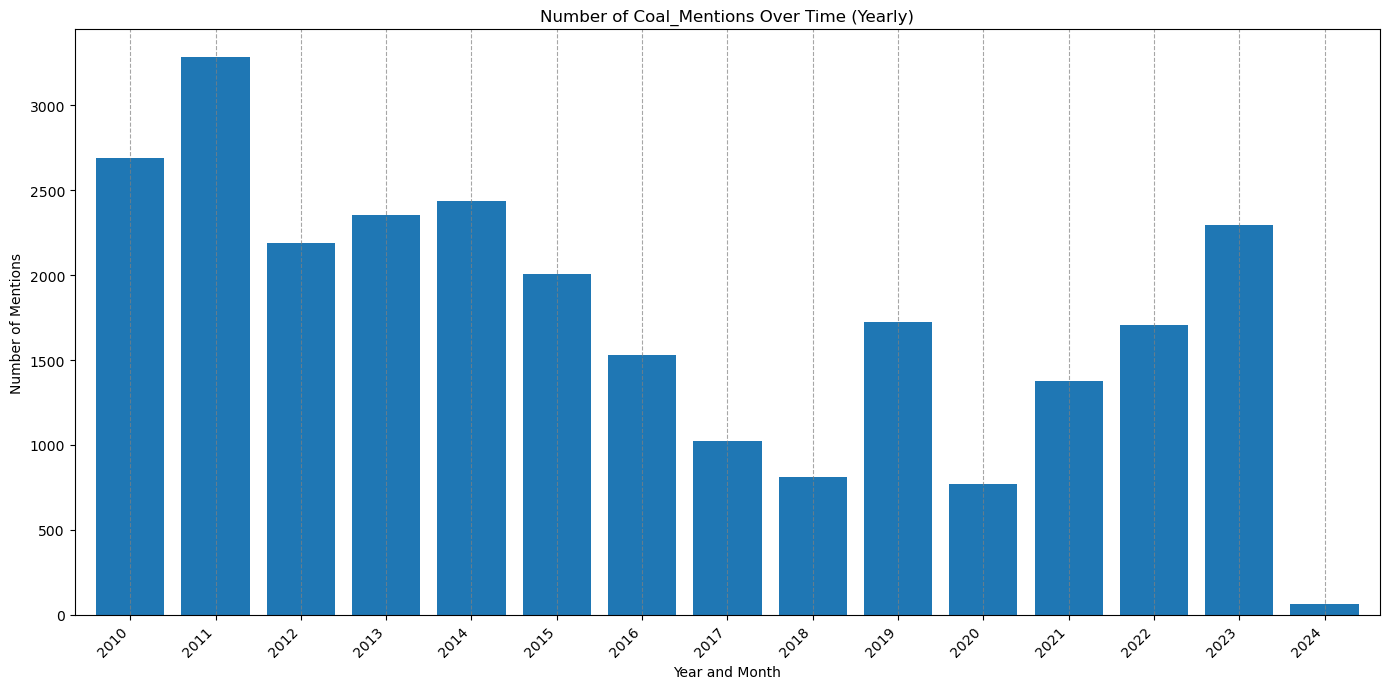

In [20]:
coal_data_filtered_nodup['Date'] = pd.to_datetime(coal_data_filtered_nodup['Date'])

# Extract year and month from the 'Date' column
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('Y')

# Extract mentions of "JETP" from the 'Article_Text' column
coal_data_filtered_nodup['Coal_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count('Coal', flags=re.IGNORECASE)

# Group by YearMonth and sum the mentions of "JETP" for each month
jetp_mentions_per_month = coal_data_filtered_nodup.groupby('YearMonth')['Coal_Mentions'].sum()

# Plot the histogram
plt.figure(figsize=(14, 7))  # Increased figure size
jetp_mentions_per_month.plot(kind='bar', width=0.8)
plt.title('Number of Coal_Mentions Over Time (Yearly)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_40047/2411903738.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('M')


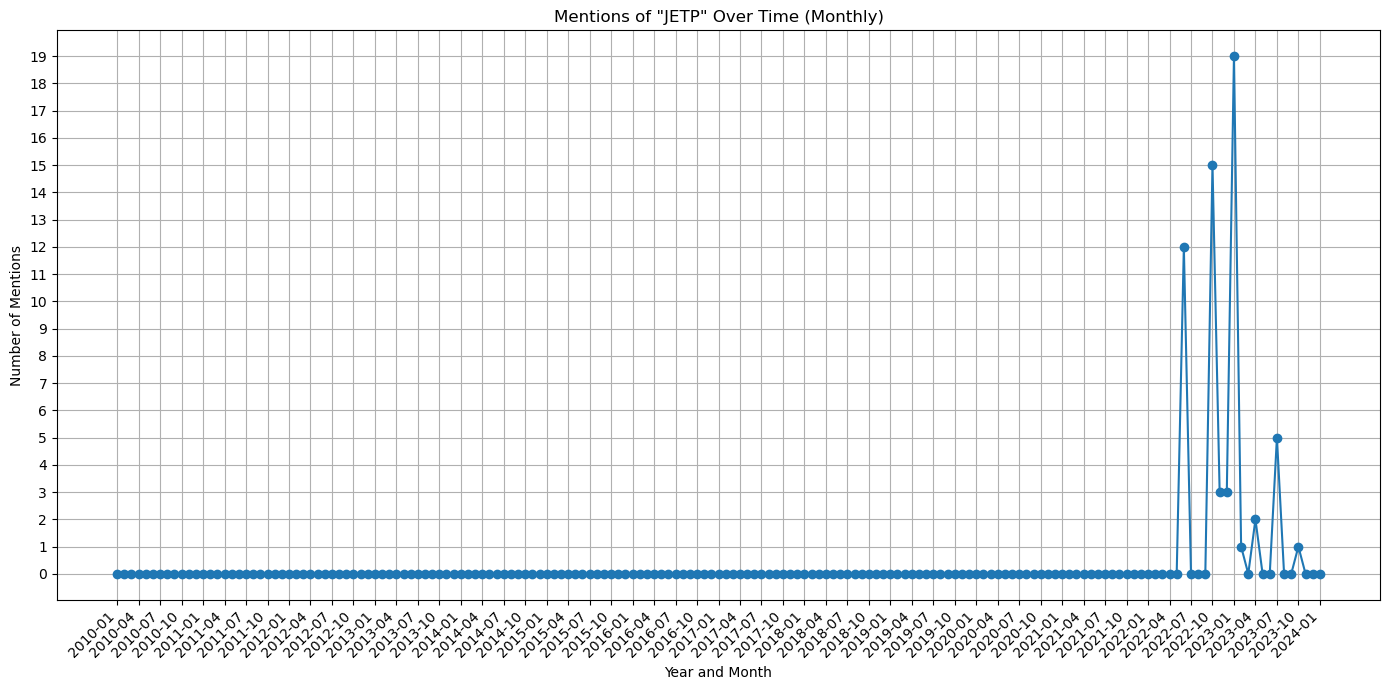

In [11]:
# Convert 'Date' column to datetime format
coal_data_filtered_nodup['Date'] = pd.to_datetime(coal_data_filtered_nodup['Date'])

# Extract year and month from the 'Date' column
coal_data_filtered_nodup['YearMonth'] = coal_data_filtered_nodup['Date'].dt.to_period('M')

# Extract mentions of "JETP" from the 'Article_Text' column
coal_data_filtered_nodup['JETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

# Group by YearMonth and sum the mentions of "JETP" for each month
jetp_mentions_per_month = coal_data_filtered_nodup.groupby('YearMonth')['JETP_Mentions'].sum()

# Plot the mentions of "JETP" over time

plt.figure(figsize=(14, 7))
plt.plot(jetp_mentions_per_month.index.astype(str), jetp_mentions_per_month.values, marker='o', linestyle='-')
plt.title('Mentions of "JETP" Over Time (Monthly)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')  # Adjusting rotation and alignment
x_ticks = jetp_mentions_per_month.index.astype(str)[::3]
plt.xticks(x_ticks, rotation=45, ha='right')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:d}'.format(int(x))))
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

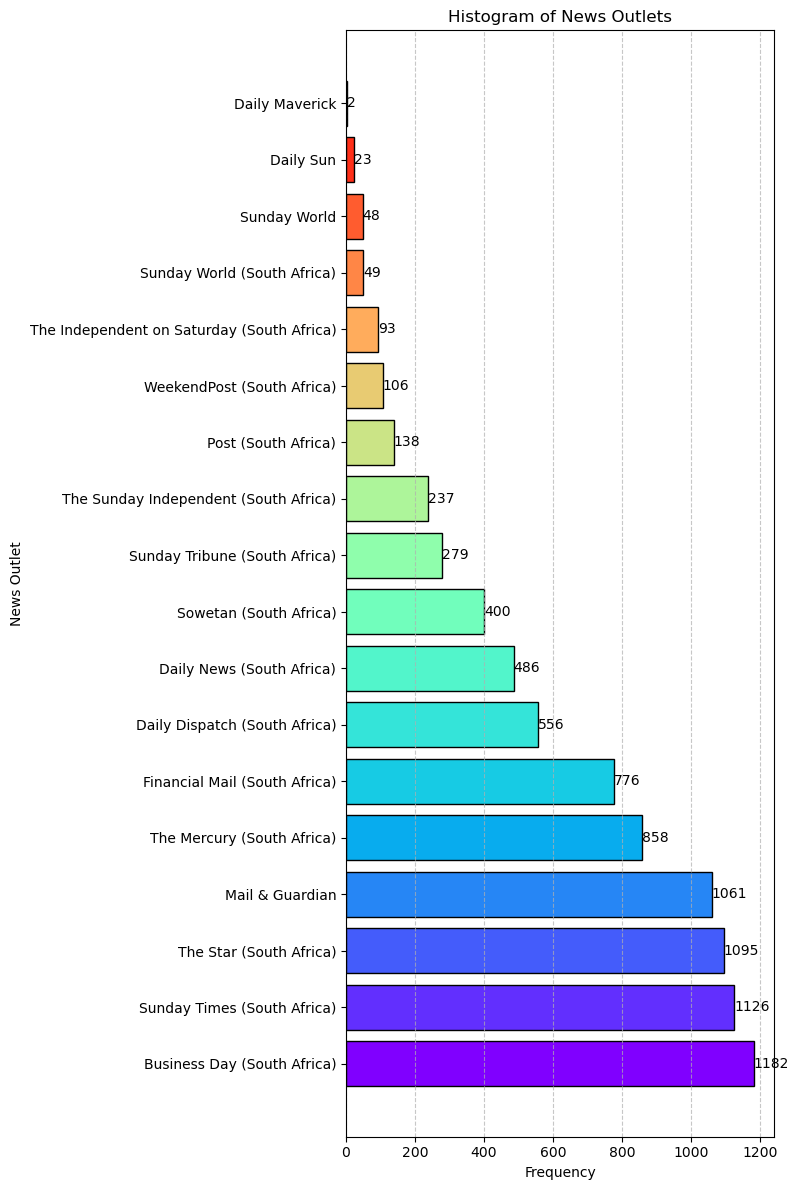

In [12]:
import numpy as np

# Get the unique values of the 'News Outlet' column
unique_outlets = coal_data_filtered_nodup['News Outlet'].unique()

# Count the frequency of each outlet
outlet_counts = coal_data_filtered_nodup['News Outlet'].value_counts()

# Plot histogram with outlets on the y-axis
plt.figure(figsize=(8, 12))  # Adjust figure size as needed

# Define colors using a colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_outlets)))

# Plot horizontal bars with rainbow colors
plt.barh(outlet_counts.index, outlet_counts.values, color=colors, edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('News Outlet')
plt.title('Histogram of News Outlets')

# Annotate each bar with the number of articles
for i, count in enumerate(outlet_counts.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()

In [21]:
# Count the number of articles with at least one mention of "JETP"
coal_data_filtered_nodup['JETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

num_articles_with_jetp = (coal_data_filtered_nodup['JETP_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'JETP':", num_articles_with_jetp)

Number of articles with at least one mention of 'JETP': 17


##### There are only 17 (28 w. regional) articles left mentioning at least once JETP 

In [22]:
# Same, but from previous dataset -> Have to load the old data for that
coal_data_filtered['JETP_Mentions'] = coal_data_filtered['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

num_articles_with_jetp = (coal_data_filtered['JETP_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'JETP':", num_articles_with_jetp)

NameError: name 'coal_data_filtered' is not defined

In [23]:
# Count the number of articles with at least one mention of "JETP" by newspaper outlet
articles_with_jetp_by_outlet = coal_data_filtered_nodup[coal_data_filtered_nodup['JETP_Mentions'] > 0].groupby('News Outlet').size()

print("Number of articles with at least one mention of 'JETP' by newspaper outlet:")
print(articles_with_jetp_by_outlet)


Number of articles with at least one mention of 'JETP' by newspaper outlet:
News Outlet
Business Day (South Africa)      5
Daily Dispatch (South Africa)    3
Financial Mail (South Africa)    2
Mail & Guardian                  3
Sunday Times (South Africa)      1
Sunday World                     3
dtype: int64


In [24]:
coal_data_filtered_nodup['JET_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

num_articles_with_jetp = (coal_data_filtered_nodup['JET_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'JET':", num_articles_with_jetp)


Number of articles with at least one mention of 'JET': 17


In [25]:
coal_data_filtered_nodup['JustETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjust energy transition partnership\b', flags=re.IGNORECASE)

num_articles_with_JustETP = (coal_data_filtered_nodup['JustETP_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'Just Energy Transition Partnership':", num_articles_with_JustETP)

Number of articles with at least one mention of 'Just Energy Transition Partnership': 34


##### There are 34 (50 w. regional) articles mentioning at least once "Just Energy Transition Partnership" 

In [26]:
# Count the number of articles with at least one mention of "JETP" by newspaper outlet
articles_with_JustETP_Mentions_by_outlet = coal_data_filtered_nodup[coal_data_filtered_nodup['JustETP_Mentions'] > 0].groupby('News Outlet').size()

print("Number of articles with at least one mention of 'Just Energy Transition Partnership' by newspaper outlet:")
print(articles_with_JustETP_Mentions_by_outlet)

Number of articles with at least one mention of 'Just Energy Transition Partnership' by newspaper outlet:
News Outlet
Business Day (South Africa)               8
Daily Dispatch (South Africa)             3
Daily News (South Africa)                 1
Financial Mail (South Africa)             2
Mail & Guardian                          10
Sunday Times (South Africa)               4
Sunday World                              3
The Mercury (South Africa)                2
The Sunday Independent (South Africa)     1
dtype: int64


In [27]:
# Count mentions of 'JETP' and 'Just Energy Transition Partnership'
coal_data_filtered_nodup['JET_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['JustETP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjust energy transition partnership\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['climate_finance_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bclimate finance\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['8_5bn_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\b8.5bn\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['climate_pact_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bclimate pact\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['climate_deal_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bclimate deal\b', flags=re.IGNORECASE)

# https://www.climatecommission.org.za/south-africas-jet-ip
coal_data_filtered_nodup['jetip_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjetip\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['jet-ip_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjet-ip\b', flags=re.IGNORECASE)
coal_data_filtered_nodup['justETIP_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count(r'\bjust energy transition investment plan\b', flags=re.IGNORECASE)


# Combine mentions of 'JETP'/'Just Energy Transition Partnership'/'climate finance'/'8.5bn'/'climate pact'/'climate deal' and different versions of 'jetip'
coal_data_filtered_nodup['Combined_Mentions'] = coal_data_filtered_nodup['JET_Mentions'] + coal_data_filtered_nodup['JustETP_Mentions'] + coal_data_filtered_nodup['climate_finance_Mentions'] + coal_data_filtered_nodup['8_5bn_Mentions'] + coal_data_filtered_nodup['climate_pact_Mentions'] + coal_data_filtered_nodup['climate_deal_Mentions'] + coal_data_filtered_nodup['justETIP_Mentions'] + coal_data_filtered_nodup['jet-ip_Mentions'] + coal_data_filtered_nodup['justETIP_Mentions']  


# Count number of articles with at least one mention of either 'JETP'/'Just Energy Transition Partnership'/'climate finance'/'8.5bn'/'climate pact'/'climate deal' and different versions of 'jetip'
num_articles_with_combined_mentions = (coal_data_filtered_nodup['Combined_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'JETP' or 'Just Energy Transition Partnership' or 'climate finance' or '8.5bn':", num_articles_with_combined_mentions)

Number of articles with at least one mention of 'JETP' or 'Just Energy Transition Partnership' or 'climate finance' or '8.5bn': 137


In [28]:
# Sum up mentions of each term in each article
coal_data_filtered_nodup['Combined_Mentions'] = (
    coal_data_filtered_nodup['JET_Mentions'] +
    coal_data_filtered_nodup['JustETP_Mentions'] +
    coal_data_filtered_nodup['climate_finance_Mentions'] +
    coal_data_filtered_nodup['8_5bn_Mentions'] +
    coal_data_filtered_nodup['climate_pact_Mentions'] +
    coal_data_filtered_nodup['climate_deal_Mentions'] +
    coal_data_filtered_nodup['justETIP_Mentions'] +
    coal_data_filtered_nodup['jetip_Mentions'] +
    coal_data_filtered_nodup['jet-ip_Mentions'] +
    coal_data_filtered_nodup['justETIP_Mentions']
)

# Count number of articles with at least one mention of any term
num_articles_with_combined_mentions = (coal_data_filtered_nodup['Combined_Mentions'] > 0).sum()

print("Number of articles with at least one mention of any term:", num_articles_with_combined_mentions)


Number of articles with at least one mention of any term: 137


In [24]:
# Filter the DataFrame to include only articles with mentions of 'JETP', 'Just Energy Transition Partnership', or 'climate finance'
filtered_articles = coal_data_filtered_nodup[
    (coal_data_filtered_nodup['JET_Mentions'] > 0) | 
    (coal_data_filtered_nodup['JustETP_Mentions'] > 0) | 
    (coal_data_filtered_nodup['climate_finance_Mentions'] > 0)
]

for index, row in filtered_articles.iterrows():
    article_text = row['Article_Text']
    # Split the text into words
    words = article_text.split()
    # Take the first 50 words or all if the article has less than 50 words
    first_50_words = ' '.join(words[:50])
    print("First 50 words of Article {}: {}".format(index, first_50_words))


First 50 words of Article 24: Should we take seriously the idea, promoted by World Bank president Robert |Zoellick, to partially root the global monetary system in gold? Is gold, as he claims, an "elephant in the room" because it might play a constructive role in reducing speculative turbulence and structural imbalances - or instead, is
First 50 words of Article 216: JUST energy transition. This is a concept that continues to permeate debates in governments, corporations and civil societies across world. Project 90 by 2030 defines a just energy transition as “a transition towards a sustainable, low carbon and equitable energy system which is better for people and the planet”. Greenpeace,
First 50 words of Article 1127: SA shows global leadership through the new just energy transition partnership ANTONY PHILLIPSON, ANDREAS PESCHKE, AURÉLIEN LECHEVALLIER, TODD P HASKELL and RIINA KIONKAOn November 2 the governments of SA, the UK, the US, France, Germany and the EU issued a political decl

In [5]:
coal_data_filtered_nodup['just_transition_Mentions'] = coal_data_filtered_nodup['Article_Text'].str.count('just transition', flags=re.IGNORECASE)

num_articles_with_jetp = (coal_data_filtered_nodup['just_transition_Mentions'] > 0).sum()

print("Number of articles with at least one mention of 'just transition':", num_articles_with_jetp)

Number of articles with at least one mention of 'just transition': 243


#### Problem: Why there are so few articles talking about JETP now? in uncleaned dataset were over 500  
#### When including the other variation of jetp -> 137 (200 w. regional)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import re
coal_data_original = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv')


/var/folders/b2/b80y7bln16n67zwg12k_n4mc0000gn/T/ipykernel_4181/1607152541.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  coal_data_original = pd.read_csv('/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv')


In [3]:
print(coal_data_original.head())


   Unnamed: 0                 Jurisdiction  Location ContentType Byline  \
0           0                International       NaN        News    NaN   
1           1  U.S. Federal; International       NaN        News    NaN   
2           2                International       NaN        News    NaN   
3           3  U.S. Federal; International       NaN        News    NaN   
4           4  U.S. Federal; International       NaN        News    NaN   

   WordLength WebNewsUrl  Geography  NegativeNews Language  ...  \
0         279        NaN        NaN           NaN  ENGLISH  ...   
1        5990        NaN        NaN           NaN  ENGLISH  ...   
2         330        NaN        NaN           NaN  ENGLISH  ...   
3         473        NaN        NaN           NaN  ENGLISH  ...   
4         571        NaN        NaN           NaN  ENGLISH  ...   

   DocumentContent_odata_mediaContentType  \
0                    application/atom+xml   
1                    application/atom+xml   
2          

In [12]:
# Count the number of articles with at least one mention of "JETP" by newspaper outlet
coal_data_original['Overview'] = coal_data_original['Overview'].str.replace(r',.*', '', regex=True)
coal_data_original['JETP_Mentions'] = coal_data_original['Article_Text'].str.count(r'\bJETP\b', flags=re.IGNORECASE)

articles_with_jetp_by_outlet = coal_data_original[coal_data_original['JETP_Mentions'] > 0].groupby('Overview').size()


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Print only the specified number of rows
print("Number of articles with at least one mention of 'JETP' by newspaper outlet:")
print(articles_with_jetp_by_outlet)



Number of articles with at least one mention of 'JETP' by newspaper outlet:
Overview
( AFP ) Indonesia on Tuesday launched an investment plan to attract $20 billion pledged by Western nations in a renewable energy transition pact agreed last year for the archipelago to slash emissions and wean itself off coal. The roadmap                                                                                                                                        1
Africa Business                                                                                                                                                                                                                                                                                                                                                                       6
Africa Newswire                                                                                                                                                    

##### As can be seen above -> Most JETP mentions come from Newspapers we kicked out in the filtering process 

In [13]:
total_articles_with_jetp = articles_with_jetp_by_outlet.sum()

print("Total number of articles mentioning 'JETP':", total_articles_with_jetp)


Total number of articles mentioning 'JETP': 527
